# Love Island Twitter API Requests

This project was part of a course on Data Mining and Machine Learning1. The goal was to gather tweets related to '#LoveIsland' using the Twitter API. A total of 220,000 tweets were collected by making daily requests to the API using Python. 

Once the tweet data was obtained, it was cleaned to remove duplicates, common words, and other unwanted elements. Additionally, a sentiment analysis was performed to understand the overall sentiment expressed in the tweets. A word cloud visualization was also created to display the most frequently used words.

In [2]:
import tweepy
import configparser
import pandas as pd
import numpy as np
import matplotlib as plt
import textblob 
import requests
import re
import warnings
import string
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from textblob import TextBlob
#from sklearn.model_selection import trian_test_split
#from sklearn.feature_extraction.text import CountVertorizer
warnings.filterwarnings('ignore')

# Connect to the Twitter API 

In [2]:
#File with API keys and tokens
%run ./config.ipynb

In [3]:
#Connect to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api= tweepy.API(auth)

In [4]:
#Define keywords and parameters
keywords ='#LoveIsland OR #loveisland OR #LoveISland OR #Loveisland -filter:retweets'
exclude:'retweets'
exclude:'RT'
limit =10000

In [83]:
#Request the tweet data from the API
#Define needed data points
tweet  =[]
likes =[]
retweets =[]
time =[]

#request the tweets by search
for i in tweepy.Cursor(api.search_tweets, q=keywords, tweet_mode='extended', 
                       count=200, lang='en', until='2022-07-31', ).items(limit):
    tweet.append(i.full_text)
    likes.append(i.favorite_count)
    retweets.append(i.retweet_count)
    time.append(i.created_at)


In [89]:
#transform the requested data into a pandas data frame 
df21 =pd.DataFrame({'tweet':tweet, 'likes':likes, 'retweets':retweets,'time':time})

12th July 

In [7]:
df1

,tweet,likes,retweets,time
0,I really don’t know wether to feel sorry for J...,1,0,2022-07-12 23:59:55+00:00
1,I NEVER CRIED SO MUCH FOR A SHOW #LoveIsland #...,0,0,2022-07-12 23:59:54+00:00
2,He did it himself 👏🏾 #LoveIsland Hope he goes ...,0,0,2022-07-12 23:59:52+00:00
3,"I am oddly emotional about that dude leaving, ...",0,0,2022-07-12 23:59:51+00:00
4,Good on Jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00
...,...,...,...,...
9995,🥺 as soon as Luca started crying #LoveIsland,3,0,2022-07-12 21:05:31+00:00
9996,Your health is your wealth. Jacques head was f...,1,0,2022-07-12 21:05:30+00:00
9997,This episode is bittersweet #LoveIsland,1,0,2022-07-12 21:05:30+00:00
9998,"So Jacques leaving, telling paige he wants he...",2,0,2022-07-12 21:05:30+00:00


In [98]:
df1.to_csv('LI1.csv')

In [97]:
df1 = pd.read_csv('LI1.csv') 

13th July

In [35]:
df2 

,tweet,likes,retweets,time
0,It's this time of the season again #LoveIsland...,3,0,2022-07-13 23:59:59+00:00
1,That was the driest episode in Love Island his...,3,0,2022-07-13 23:59:37+00:00
2,Adam is giving me bad vibes. I never watched h...,2,0,2022-07-13 23:59:14+00:00
3,what is this movie night business? did that st...,0,0,2022-07-13 23:58:46+00:00
4,Exactly. #LoveIsland https://t.co/NzUeivXuFx,1,0,2022-07-13 23:58:32+00:00
...,...,...,...,...
9995,They couldn’t get Skillibeng nah #loveisland,1,0,2022-07-13 21:11:26+00:00
9996,I think I’ve heard this song on the radio befo...,0,0,2022-07-13 21:11:26+00:00
9997,Dami using those twerking lessons he got #Love...,1,0,2022-07-13 21:11:26+00:00
9998,I’ve never heard of Becky Hill in my life befo...,1,0,2022-07-13 21:11:26+00:00


In [ ]:
df2.to_csv('LI2.csv')

In [47]:
df2 = pd.read_csv('LI2.csv') 

14th July

In [36]:
df3

,tweet,likes,retweets,time
0,Where the fuck are the important challenges #L...,1,0,2022-07-14 23:59:57+00:00
1,That was the stupidest challenge I have ever w...,8,0,2022-07-14 23:59:55+00:00
2,"idc how in love they are, I will burn that vil...",25,1,2022-07-14 23:59:50+00:00
3,Everyday staff meeting with Danica. #LoveIsland,0,0,2022-07-14 23:59:36+00:00
4,Andrew loves breast a lot 🤣🤣💀💀💀 #Loveisland,0,0,2022-07-14 23:59:32+00:00
...,...,...,...,...
9995,Send Tasha home PLS #LoveIsland,2,0,2022-07-14 21:12:51+00:00
9996,WHY TASH YALLLL #loveisland,1,0,2022-07-14 21:12:51+00:00
9997,Come out DI YARDDDDD TASHA pack up ya tingsss ...,2,0,2022-07-14 21:12:51+00:00
9998,they better not let the islanders choose who g...,6,1,2022-07-14 21:12:51+00:00


In [ ]:
df3.to_csv('LI3.csv')

In [48]:
df3 = pd.read_csv('LI3.csv') 

15th July

In [37]:
df4

,tweet,likes,retweets,time
0,tasha please #LoveIsland,0,0,2022-07-15 23:59:53+00:00
1,@Ahm3dzs just saw that now. luca and a rattle ...,1,0,2022-07-15 23:59:20+00:00
2,@JCunha031 @tylahhousley2 @AmberRoseGill #Love...,2,0,2022-07-15 23:59:19+00:00
3,I'm sick of watching sassy bad bitch Tasha cry...,1,0,2022-07-15 23:59:11+00:00
4,YOU WANT ME TO WAIT TILL SUNDAY?!?! #LoveIsland,1,0,2022-07-15 23:59:04+00:00
...,...,...,...,...
9995,PLSSS luca’s in tears now after he just shamed...,3,0,2022-07-15 21:00:24+00:00
9996,That Gemma clip was not deep at all??? And he’...,3,0,2022-07-15 21:00:24+00:00
9997,Immediately cancels Sunday plans * #loveisland,6,0,2022-07-15 21:00:24+00:00
9998,“dw i’ll deal with you later” LORD #LoveIslan...,687,20,2022-07-15 21:00:24+00:00


In [ ]:
df4.to_csv('LI4.csv')

In [49]:
df4 = pd.read_csv('LI4.csv') 

16th July

In [38]:
df5

,tweet,likes,retweets,time
0,This scene was too lovely #LoveIsland https://...,20,1,2022-07-16 23:59:58+00:00
1,"movie night is tonight, let the carnage begin ...",1,0,2022-07-16 23:59:38+00:00
2,#LoveIsland's Luca already trying to win over ...,2,0,2022-07-16 23:59:00+00:00
3,#LoveIsland movie night episode happening just...,0,0,2022-07-16 23:57:47+00:00
4,Davide’s impression of Ekin-Su absolutely kill...,2,0,2022-07-16 23:57:25+00:00
...,...,...,...,...
9995,Loooooool I feel like Ekin-Su has been vindica...,2,0,2022-07-15 22:00:49+00:00
9996,@diffindokat #LoveIsland was just thinking thi...,0,0,2022-07-15 22:00:45+00:00
9997,I was team Damiyah but Casa showed Dami’s true...,6,0,2022-07-15 22:00:44+00:00
9998,she doesn’t love him at all 😂 bs #LoveIsland,0,0,2022-07-15 22:00:43+00:00


In [ ]:
df5.to_csv('LI5.csv')

In [50]:
df5 = pd.read_csv('LI5.csv') 

17th July

In [39]:
df6

,tweet,likes,retweets,time
0,“Who do you want to win?” No one 😭 #LoveIsland,1,1,2022-07-17 23:59:55+00:00
1,"Luca is a disgusting, obsessive red flag that ...",4,0,2022-07-17 23:59:52+00:00
2,"#LoveIsland review EP.42, Firstly no one's win...",0,0,2022-07-17 23:59:52+00:00
3,The boys on this villa are all bitches!!! Ever...,0,0,2022-07-17 23:59:49+00:00
4,I'm Not Indiyah fan but I need to defend her.\...,2,0,2022-07-17 23:59:49+00:00
...,...,...,...,...
9995,Like ekin- su and Davide needs to get his act ...,0,0,2022-07-17 21:20:50+00:00
9996,"Indiyah babe,please don’t take him back that e...",16,0,2022-07-17 21:20:50+00:00
9997,I want the real Ekin-su back 🥺...\n\n#LoveIsla...,8,1,2022-07-17 21:20:49+00:00
9998,"Dear Ekin, u are not exclusive, u are not boyf...",10,0,2022-07-17 21:20:49+00:00


In [ ]:
df6.to_csv('LI6.csv')

In [51]:
df6 = pd.read_csv('LI6.csv') 

18th July

In [99]:
df7

,tweet,likes,retweets,time
0,PLEASE IM TIRED OF SEEING LUCA &amp; DAMI ON M...,1,0,2022-07-18 23:59:59+00:00
1,I used to think get Tasha and Andrew out but n...,5,0,2022-07-18 23:59:57+00:00
2,"Girls are weird man, how do you cry in public ...",1,0,2022-07-18 23:59:55+00:00
3,Telling people “something isn’t that deep” is ...,0,0,2022-07-18 23:59:54+00:00
4,TBH I’m over everyone in the villa except Ekin...,1,0,2022-07-18 23:59:50+00:00
...,...,...,...,...
9995,Luca’s crying under that pie mix isn’t he #Lov...,0,0,2022-07-18 21:19:02+00:00
9996,Voted indiyah and Deji even tho I know my vote...,4,1,2022-07-18 21:19:02+00:00
9997,#loveisland #talkswithash slay https://t.co/CY...,0,0,2022-07-18 21:19:02+00:00
9998,icl i voted for tasha and andrew luca needs to...,2,1,2022-07-18 21:19:02+00:00


In [ ]:
df7.to_csv('LI7.csv')

In [52]:
df7 = pd.read_csv('LI7.csv') 

19th July 

In [100]:
df8

,tweet,likes,retweets,time
0,danica deserves so so much better :( she’s act...,3,0,2022-07-19 23:59:49+00:00
1,the spot for finals imo is gonna be between ta...,4,0,2022-07-19 23:59:47+00:00
2,Bro Billy's an A1 cunt.. #LoveIsland,2,0,2022-07-19 23:59:41+00:00
3,Yeah I’m officially done with love island uk. ...,3,0,2022-07-19 23:59:24+00:00
4,So I was on a plane with message-only WiFi and...,9,0,2022-07-19 23:59:22+00:00
...,...,...,...,...
9995,So the public finally got Dami in the bottom t...,2,0,2022-07-19 21:18:08+00:00
9996,The votes have been counted and Dami is in the...,2,0,2022-07-19 21:18:08+00:00
9997,Reality check for Dami!!!!\nLuca is one lucky ...,2,0,2022-07-19 21:18:08+00:00
9998,That was a shit cliff hanger ! They’re not goi...,3,0,2022-07-19 21:18:07+00:00


In [ ]:
df8.to_csv('LI8.csv')

In [53]:
df8 = pd.read_csv('LI8.csv') 

20th July

In [101]:
df9

,tweet,likes,retweets,time
0,And the thing is - men can have sex with you w...,1,0,2022-07-20 23:59:59+00:00
1,I don’t want to be sound rude but dami is the ...,4,0,2022-07-20 23:59:27+00:00
2,Tasha walking round the Villa #LoveIsland http...,0,0,2022-07-20 23:59:22+00:00
3,Follow Luca on instagram @ lucabish 👈 #LoveIsl...,1,0,2022-07-20 23:59:16+00:00
4,wth do they mean billy has been missed ?! #Lov...,0,0,2022-07-20 23:59:10+00:00
...,...,...,...,...
9995,Lol she has nothing on Ekin and I need Ekin to...,1,1,2022-07-20 20:56:55+00:00
9996,Ekin-su is ready to fight istg #LoveIsland htt...,6,0,2022-07-20 20:56:55+00:00
9997,Dont worry ekin she has nothing on you. Davide...,7,1,2022-07-20 20:56:55+00:00
9998,Nathalia please know your place in the villa a...,3,0,2022-07-20 20:56:55+00:00


In [ ]:
df9.to_csv('LI9.csv')

In [54]:
df9 = pd.read_csv('LI9.csv') 

21st July

In [102]:
df10

,tweet,likes,retweets,time
0,This was such a dead moment. I literally watch...,29,1,2022-07-21 23:59:55+00:00
1,Adam to Paige when the show is over. #LoveIsla...,4,0,2022-07-21 23:59:53+00:00
2,paige is pissing me off begging for compliment...,2,0,2022-07-21 23:59:53+00:00
3,pls someone get me this pic of #ekinsu without...,0,0,2022-07-21 23:59:52+00:00
4,Adam said he’s playing the game safe this time...,5,0,2022-07-21 23:59:36+00:00
...,...,...,...,...
9995,Me wanting to be happy for page and Adam vs me...,75,0,2022-07-21 21:13:34+00:00
9996,Oh fuck off.. don't believe a word of this shi...,2,0,2022-07-21 21:13:34+00:00
9997,Adam and paige content &lt;&lt;&lt;&lt;&lt;&lt...,0,0,2022-07-21 21:13:34+00:00
9998,Adam is really determined to win this season t...,58,4,2022-07-21 21:13:34+00:00


In [ ]:
df10.to_csv('LI10.csv')

In [55]:
df10 = pd.read_csv('LI10.csv') 

    22nd July

In [103]:
df11

,tweet,likes,retweets,time
0,Unpopular opinion: Paige comes across a bit en...,6,0,2022-07-22 23:59:56+00:00
1,gemma telling luca she loves him first and him...,17,2,2022-07-22 23:59:51+00:00
2,Ekin suzieeee is so funny😂😂 #Loveisland,2,0,2022-07-22 23:59:43+00:00
3,Unpopular opinion: i like Paige #LoveIsland,10,1,2022-07-22 23:59:26+00:00
4,Ekin won the challenge!! 💃🏽#LoveISland,1,0,2022-07-22 23:59:25+00:00
...,...,...,...,...
9995,when will ekin choose ffs\n\n#loveisland #Love...,8,0,2022-07-22 21:08:28+00:00
9996,Mother #loveisland https://t.co/OIntMgmO1a,4,0,2022-07-22 21:08:27+00:00
9997,okay Tasha and Andrew have grown on me ngl #Lo...,129,7,2022-07-22 21:08:27+00:00
9998,Why didn't the bombshells try and get to know ...,1,0,2022-07-22 21:08:27+00:00


In [ ]:
df11.to_csv('LI11.csv')

In [56]:
df11 = pd.read_csv('LI11.csv') 

23rd July

In [104]:
df12

,tweet,likes,retweets,time
0,davide and ekin are even cuter on unseen bits ...,8,1,2022-07-23 23:59:36+00:00
1,I know this ain’t the same Summer ya’ll were s...,46,0,2022-07-23 23:59:17+00:00
2,I've just watched episode S08 | E48 of Love Is...,0,0,2022-07-23 23:58:28+00:00
3,Today’s unseen bits is an Ekinde winners’ edit...,7,0,2022-07-23 23:57:43+00:00
4,danica baby RUN #LoveIsland #LoveIslandUK http...,30,2,2022-07-23 23:57:11+00:00
...,...,...,...,...
9995,Guys get ekin to a mill on insta #LoveIsland,1,0,2022-07-22 21:21:53+00:00
9996,You know they brought the bombshells in to pro...,2,0,2022-07-22 21:21:53+00:00
9997,I know loads of people are going to be voting ...,5,0,2022-07-22 21:21:53+00:00
9998,Not nathalia tryna be slick with her comments ...,1,0,2022-07-22 21:21:53+00:00


In [ ]:
df12.to_csv('LI12.csv')

In [57]:
df12 = pd.read_csv('LI12.csv') 

24th July

In [46]:
df13

,tweet,likes,retweets,time
0,Did you see the face Gemma made when they were...,13,0,2022-07-24 23:59:56+00:00
1,All hail our queen EKIN SU #loveisland https:/...,10,0,2022-07-24 23:59:39+00:00
2,so close to the final and can’t even bring mys...,5,0,2022-07-24 23:59:23+00:00
3,@LoveIsland No Ifs No Buts!!! \n\n#DekinSu2Win...,0,0,2022-07-24 23:59:15+00:00
4,@Jdnlegg47528 @LoveIsland No Ifs No Buts!!! \n...,1,0,2022-07-24 23:59:07+00:00
...,...,...,...,...
9995,Paige is jarrin bro!!! #LoveIsland,164,7,2022-07-24 20:54:53+00:00
9996,Awwwwwww Deji is going home :( #LoveIsland,106,7,2022-07-24 20:54:53+00:00
9997,Danica and jamie deserve better #loveisland,0,0,2022-07-24 20:54:53+00:00
9998,Who voted danica over deji #loveisland https:/...,15,0,2022-07-24 20:54:53+00:00


In [ ]:
df13.to_csv('LI13.csv')

In [58]:
df13 = pd.read_csv('LI13.csv') 

25th July

In [45]:
df14

,tweet,likes,retweets,time
0,I love Ekin so much I’m thinking about naming ...,1,0,2022-07-25 23:59:55+00:00
1,Andrew is so supportive of Tasha is so cute st...,7,0,2022-07-25 23:59:50+00:00
2,LOOOL I'm actually on the bus crying genuine t...,1,0,2022-07-25 23:59:49+00:00
3,I lost when I saw his face 😭😭😭 #LoveIsland htt...,1,0,2022-07-25 23:59:44+00:00
4,Tonight has had me bussing up &amp; dying even...,2,0,2022-07-25 23:59:33+00:00
...,...,...,...,...
9995,OH MY LORD #LoveIsland,0,0,2022-07-25 20:59:57+00:00
9996,PERMISSION TO DANCEEEE #LoveIsland,1,0,2022-07-25 20:59:57+00:00
9997,Luca you are not Troy Bolton you cringy wet so...,1,0,2022-07-25 20:59:57+00:00
9998,this talent show is so funny😭 #LoveIsland,0,0,2022-07-25 20:59:57+00:00


In [ ]:
df14.to_csv('LI14.csv')

In [59]:
df14 = pd.read_csv('LI14.csv') 

26th July

In [44]:
df15

,tweet,likes,retweets,time
0,You people saying Dami is the reason they’re i...,9,0,2022-07-26 23:59:58+00:00
1,Why did the girls look so nervous watching Pai...,2,0,2022-07-26 23:59:28+00:00
2,TANDREW🥰🥰🥰🥰🥰🥰🥰🥰😍😍😍😍😍😍 #LoveIsland,2,0,2022-07-26 23:59:09+00:00
3,The moment “ick” hit…\n#LoveIsland #LoveIsland...,9,0,2022-07-26 23:58:49+00:00
4,They really thought bringing Adam back was a g...,1,0,2022-07-26 23:58:32+00:00
...,...,...,...,...
9995,What fuckwits are voting for Luca and Gemma #L...,7,1,2022-07-26 21:03:08+00:00
9996,If this is down to the islanders to vote out I...,0,0,2022-07-26 21:03:08+00:00
9997,they’re gonna leave it on a cliff hanger innit...,2,0,2022-07-26 21:03:08+00:00
9998,I’m sure this is Indiyahs first time being bot...,0,0,2022-07-26 21:03:08+00:00


In [ ]:
df15.to_csv('LI15.csv')

In [60]:
df15 = pd.read_csv('LI15.csv') 

27th July

In [43]:
df16

,tweet,likes,retweets,time
0,i really like dami and indiyah both together a...,18,0,2022-07-27 23:59:31+00:00
1,#LoveIsland amazing how they can all be great...,1,0,2022-07-27 23:59:27+00:00
2,i just KNOW she’d plan a good hen do #loveisla...,3,0,2022-07-27 23:59:21+00:00
3,Yeah I knew Danica and Jamie were off but I ho...,2,0,2022-07-27 23:59:13+00:00
4,Blink twice if you're being held hostage. #Lov...,9,0,2022-07-27 23:59:04+00:00
...,...,...,...,...
9995,I’M GOOOONNNEEEE 🤣 #LoveIsland https://t.co/AT...,3,0,2022-07-27 20:52:39+00:00
9996,THE EDGES 😭😭😭 #LoveIsland,0,0,2022-07-27 20:52:39+00:00
9997,OK Andrew is my new favourite after tonight’s ...,22,0,2022-07-27 20:52:39+00:00
9998,Ekin it’s enough leave the baby please #LoveIs...,17,0,2022-07-27 20:52:39+00:00


In [ ]:
df16.to_csv('LI16.csv')

In [61]:
df16 = pd.read_csv('LI16.csv') 

In [86]:
df17

,tweet,likes,retweets,time
0,why was luca so annoyed that indiyah and dami...,26,1,2022-07-31 23:59:58+00:00
1,why luca smirked when tasha and andrew get cal...,9,1,2022-07-31 23:59:58+00:00
2,lol bye honeybuns,1,0,2022-07-31 23:59:57+00:00
3,nah i’m sorry what’s this face paige is pullin...,2,0,2022-07-31 23:59:53+00:00
4,i’m so glad luca’s parents aren’t shy of telli...,4,1,2022-07-31 23:59:52+00:00
...,...,...,...,...
9995,obvs,4,0,2022-07-31 21:18:40+00:00
9996,go go go go go,9,0,2022-07-31 21:18:40+00:00
9997,gemma stfu whore,1,0,2022-07-31 21:18:40+00:00
9998,this is the password vote damiyah,1,0,2022-07-31 21:18:40+00:00


In [ ]:
df17.to_csv('LI17.csv')

In [62]:
df17 = pd.read_csv('LI17.csv') 

In [88]:
df18

,tweet,likes,retweets,time
0,lol ok its actually insane that ekin su is the...,0,0,2022-08-01 17:34:46+00:00
1,"luca is lucky that the ""luca"" trend is mixed i...",0,0,2022-08-01 17:34:43+00:00
2,dami still believing indiyah bringing back dej...,0,0,2022-08-01 17:34:34+00:00
3,nah stop it i’d legit get married in this dres...,0,0,2022-08-01 17:34:31+00:00
4,i need to get this off my chest anyone remembe...,1,0,2022-08-01 17:34:01+00:00
...,...,...,...,...
9995,i don’t think i’d be happy if a child of a foo...,3,0,2022-07-31 22:10:28+00:00
9996,"i knew this girl was weird: ""i can't smell it ...",1,0,2022-07-31 22:10:27+00:00
9997,so gemma doesn't value or like dami or indiyah...,6,0,2022-07-31 22:10:27+00:00
9998,i’m really trying to find something positive a...,7,0,2022-07-31 22:10:27+00:00


In [ ]:
df18.to_csv('LI18.csv')

In [63]:
df18 = pd.read_csv('LI18.csv') 

In [106]:
df19 

,tweet,likes,retweets,time
0,These islanders are BITTER AF about ekin and d...,7,0,2022-07-29 23:59:30+00:00
1,Turkey and Italy better be downloading their V...,3,0,2022-07-29 23:59:26+00:00
2,They damn well knew they couldn’t get Gemma to...,2,0,2022-07-29 23:58:59+00:00
3,IF Ekin-Sue and Davide \nGet sent home \n\n🚨 #...,0,0,2022-07-29 23:58:58+00:00
4,I'm so happy Damiyah to the finals!! wooo #Lov...,1,0,2022-07-29 23:58:50+00:00
...,...,...,...,...
9995,SAVE EKIN SU AND DAVIDE DFF THEY REALLY TRIED ...,2,0,2022-07-29 20:59:25+00:00
9996,#loveisland all of these islanders are fake ga...,2,0,2022-07-29 20:59:25+00:00
9997,We need to vote for Davide and Ekin su to save...,0,0,2022-07-29 20:59:25+00:00
9998,IM SWEATING I CANNOT I CANNOT I CANNOT NO NO N...,4,0,2022-07-29 20:59:25+00:00


In [75]:
df19.to_csv('LI19.csv')

In [105]:
df19 = pd.read_csv('LI19.csv') 

In [77]:
df20

,tweet,likes,retweets,time
0,These islanders are BITTER AF about ekin and d...,7,0,2022-07-29 23:59:30+00:00
1,Turkey and Italy better be downloading their V...,3,0,2022-07-29 23:59:26+00:00
2,They damn well knew they couldn’t get Gemma to...,2,0,2022-07-29 23:58:59+00:00
3,IF Ekin-Sue and Davide \nGet sent home \n\n🚨 #...,0,0,2022-07-29 23:58:58+00:00
4,I'm so happy Damiyah to the finals!! wooo #Lov...,1,0,2022-07-29 23:58:50+00:00
...,...,...,...,...
9995,SAVE EKIN SU AND DAVIDE DFF THEY REALLY TRIED ...,2,0,2022-07-29 20:59:25+00:00
9996,#loveisland all of these islanders are fake ga...,2,0,2022-07-29 20:59:25+00:00
9997,We need to vote for Davide and Ekin su to save...,0,0,2022-07-29 20:59:25+00:00
9998,IM SWEATING I CANNOT I CANNOT I CANNOT NO NO N...,4,0,2022-07-29 20:59:25+00:00


In [80]:
df20.to_csv('LI20.csv')

In [65]:
df20 = pd.read_csv('LI20.csv') 

In [111]:
df21

,tweet,likes,retweets,time
0,"If you like #LoveIslandUK , you gonna like #Lo...",0,0,2022-07-30 23:59:48+00:00
1,My favorite phrase from #LoveIsland is “Fuckin...,3,0,2022-07-30 23:57:34+00:00
2,When yah showed yah #love me did yah lie #Twit...,1,0,2022-07-30 23:57:10+00:00
3,Luca: I'd wish they show me cracking on with a...,0,0,2022-07-30 23:56:43+00:00
4,As Gemma once said “too switched on for this s...,2,1,2022-07-30 23:54:59+00:00
...,...,...,...,...
9995,Watching #loveisland #LoveIslandUK #EKINDE htt...,6,0,2022-07-29 21:22:43+00:00
9996,Yeah some of you people need to stop denying w...,24,2,2022-07-29 21:22:38+00:00
9997,Not me laughing out loud when Luca said he did...,6,0,2022-07-29 21:22:38+00:00
9998,@lucy4361819209 Branded store and branded food...,2,0,2022-07-29 21:22:36+00:00


In [108]:
df21.to_csv('LI21.csv')

In [110]:
df21 = pd.read_csv('LI21.csv') 

## Combine all the tweets and save to one CSV file

In [68]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21]
df = pd.concat(frames)

In [69]:
df.to_csv('LI.csv')

## Load file with all the tweets from 12th - 30th July

In [112]:
df = pd.read_csv('LI.csv') 

In [115]:
df.head()

,tweet,likes,retweets,time
0,I really don’t know wether to feel sorry for J...,1,0,2022-07-12 23:59:55+00:00
1,I NEVER CRIED SO MUCH FOR A SHOW #LoveIsland #...,0,0,2022-07-12 23:59:54+00:00
2,He did it himself 👏🏾 #LoveIsland Hope he goes ...,0,0,2022-07-12 23:59:52+00:00
3,"I am oddly emotional about that dude leaving, ...",0,0,2022-07-12 23:59:51+00:00
4,Good on Jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00


In [116]:
#convert tweet into string variable 
df['tweet'] = df['tweet'].astype('string') 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tweet     210000 non-null  string
 1   likes     210000 non-null  int64 
 2   retweets  210000 non-null  int64 
 3   time      210000 non-null  object
dtypes: int64(2), object(1), string(1)
memory usage: 6.4+ MB


## Clean the tweets

In [118]:
#Crear a function to remove any emojis from the tweets

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

#Clean the tweets
df['tweet'] = df['tweet'].apply(remove_emojis)

df.head()

,tweet,likes,retweets,time
0,I really don’t know wether to feel sorry for J...,1,0,2022-07-12 23:59:55+00:00
1,I NEVER CRIED SO MUCH FOR A SHOW #LoveIsland #...,0,0,2022-07-12 23:59:54+00:00
2,He did it himself #LoveIsland Hope he goes an...,0,0,2022-07-12 23:59:52+00:00
3,"I am oddly emotional about that dude leaving, ...",0,0,2022-07-12 23:59:51+00:00
4,Good on Jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00


In [92]:
#Create a function to clean the text of the tweets 
#remove any unnecessary characters 
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) #Removes #'s
    text = re.sub(r'https?:\/\/\S+', '', text) #Removes hyper links 
    text = re.sub('[^A-Za-z0-9]+', ' ', text)#Remove special characters
    
    
    return text

#Clean the tweets
df['tweet'] = df['tweet'].apply(cleanTxt)

#Make all letters lowercase 
df['tweet'] = df['tweet'].str.lower()

#display clean tweets
df.head()

,tweet,likes,retweets,time
0,i really don t know wether to feel sorry for j...,1,0,2022-07-12 23:59:55+00:00
1,i never cried so much for a show,0,0,2022-07-12 23:59:54+00:00
2,he did it himself hope he goes and works on hi...,0,0,2022-07-12 23:59:52+00:00
3,i am oddly emotional about that dude leaving b...,0,0,2022-07-12 23:59:51+00:00
4,good on jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00


## Sentiment Analysis 

In [93]:
#Creat a function to get subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Creat columns to store subjectivity and polarity score 
df['subjectivity'] = df['tweet'].apply(getSubjectivity)
df['polarity'] = df['tweet'].apply(getPolarity)

df.head()

,tweet,likes,retweets,time,subjectivity,polarity
0,i really don t know wether to feel sorry for j...,1,0,2022-07-12 23:59:55+00:00,0.453333,-0.180000
1,i never cried so much for a show,0,0,2022-07-12 23:59:54+00:00,0.200000,0.200000
2,he did it himself hope he goes and works on hi...,0,0,2022-07-12 23:59:52+00:00,0.800000,-0.200000
3,i am oddly emotional about that dude leaving b...,0,0,2022-07-12 23:59:51+00:00,0.600000,-0.020000
4,good on jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00,0.588889,0.358333
...,...,...,...,...,...,...
209995,watching,6,0,2022-07-29 21:22:43+00:00,0.000000,0.000000
209996,yeah some of you people need to stop denying w...,24,2,2022-07-29 21:22:38+00:00,0.524583,0.345000
209997,not me laughing out loud when luca said he did...,6,0,2022-07-29 21:22:38+00:00,0.431250,0.009375
209998,branded store and branded food no way they ne...,2,0,2022-07-29 21:22:36+00:00,0.000000,0.000000


In [94]:
#Compute the polarity into a sentiment positive / negative / neutral 
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['analysis'] = df['polarity'].apply(getAnalysis)

df.head()

,tweet,likes,retweets,time,subjectivity,polarity,analysis
0,i really don t know wether to feel sorry for j...,1,0,2022-07-12 23:59:55+00:00,0.453333,-0.180000,Negative
1,i never cried so much for a show,0,0,2022-07-12 23:59:54+00:00,0.200000,0.200000,Positive
2,he did it himself hope he goes and works on hi...,0,0,2022-07-12 23:59:52+00:00,0.800000,-0.200000,Negative
3,i am oddly emotional about that dude leaving b...,0,0,2022-07-12 23:59:51+00:00,0.600000,-0.020000,Negative
4,good on jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00,0.588889,0.358333,Positive
...,...,...,...,...,...,...,...
209995,watching,6,0,2022-07-29 21:22:43+00:00,0.000000,0.000000,Neutral
209996,yeah some of you people need to stop denying w...,24,2,2022-07-29 21:22:38+00:00,0.524583,0.345000,Positive
209997,not me laughing out loud when luca said he did...,6,0,2022-07-29 21:22:38+00:00,0.431250,0.009375,Positive
209998,branded store and branded food no way they ne...,2,0,2022-07-29 21:22:36+00:00,0.000000,0.000000,Neutral


In [17]:
import matplotlib.pyplot as plt 
from matplotlib import cm
from colorspacious import cspace_converter

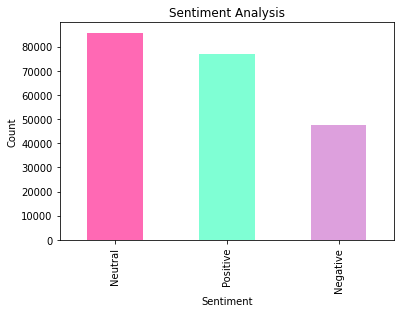

In [18]:
#Plot the amount of positive negative neutral tweets
df['analysis'].value_counts()

#Plot 
y = np.array(['hotpink', 'aquamarine', 'plum'])
df['analysis'].value_counts().plot(kind='bar', color=y)
plt.title('Sentiment Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [19]:
df['analysis'].value_counts()

Neutral     85708
Positive    76861
Negative    47431
Name: analysis, dtype: int64

In [ ]:
#Plot Subjectivity vs Polarity 

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color='deeppink')
    
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Word Cloud

In [95]:
#Remove stopwords 
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['no_stopwords'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,tweet,likes,retweets,time,subjectivity,polarity,analysis,no_stopwords
0,i really don t know wether to feel sorry for j...,1,0,2022-07-12 23:59:55+00:00,0.453333,-0.180000,Negative,really know wether feel sorry jax mental healt...
1,i never cried so much for a show,0,0,2022-07-12 23:59:54+00:00,0.200000,0.200000,Positive,never cried much show
2,he did it himself hope he goes and works on hi...,0,0,2022-07-12 23:59:52+00:00,0.800000,-0.200000,Negative,hope goes works shit cause
3,i am oddly emotional about that dude leaving b...,0,0,2022-07-12 23:59:51+00:00,0.600000,-0.020000,Negative,oddly emotional dude leaving think emotional e...
4,good on jacques for leaving the villa and putt...,1,0,2022-07-12 23:59:48+00:00,0.588889,0.358333,Positive,good jacques leaving villa putting mental heal...
...,...,...,...,...,...,...,...,...
209995,watching,6,0,2022-07-29 21:22:43+00:00,0.000000,0.000000,Neutral,watching
209996,yeah some of you people need to stop denying w...,24,2,2022-07-29 21:22:38+00:00,0.524583,0.345000,Positive,yeah people need stop denying clear casa prett...
209997,not me laughing out loud when luca said he did...,6,0,2022-07-29 21:22:38+00:00,0.431250,0.009375,Positive,laughing loud luca said think would face major...
209998,branded store and branded food no way they ne...,2,0,2022-07-29 21:22:36+00:00,0.000000,0.000000,Neutral,branded store branded food way need bargin bas...


In [96]:
#Save cleaned tweets to csv 
df.to_csv('LItweets.csv')

In [39]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

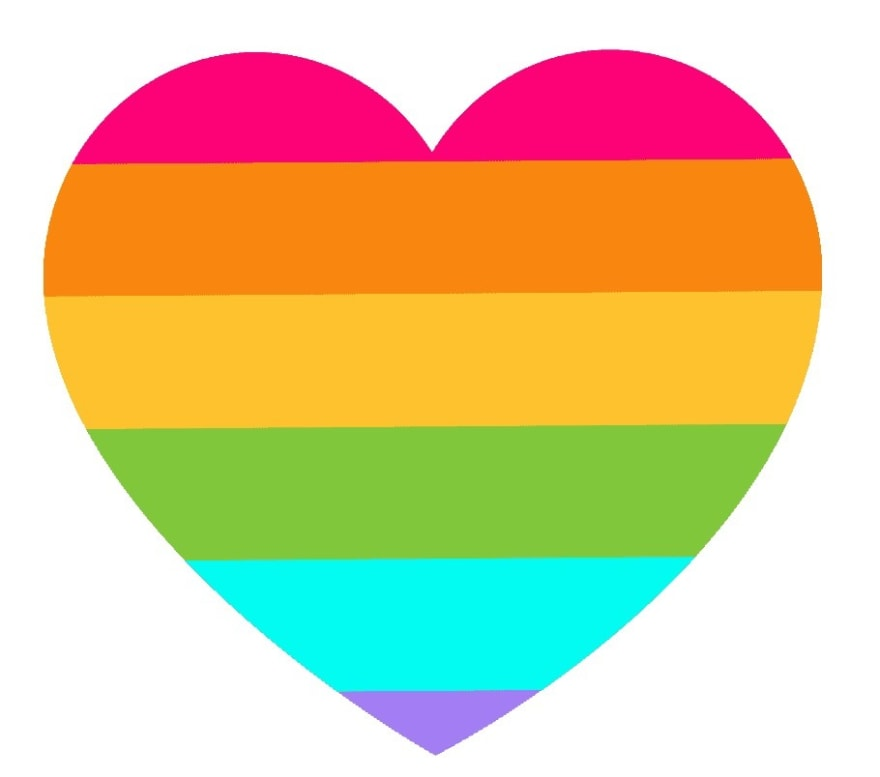

In [40]:
#I want to make the word cloud into the shape of a heart
#loading heart image found online to mask the word cloud onto
image = Image.open("rainbow_heart_mask.jpeg")  # Load the image from a file
mask = np.array(image)  # Convert the image to a numeric representation
image  # Display the image

In [41]:
image_colours = ImageColorGenerator(mask)

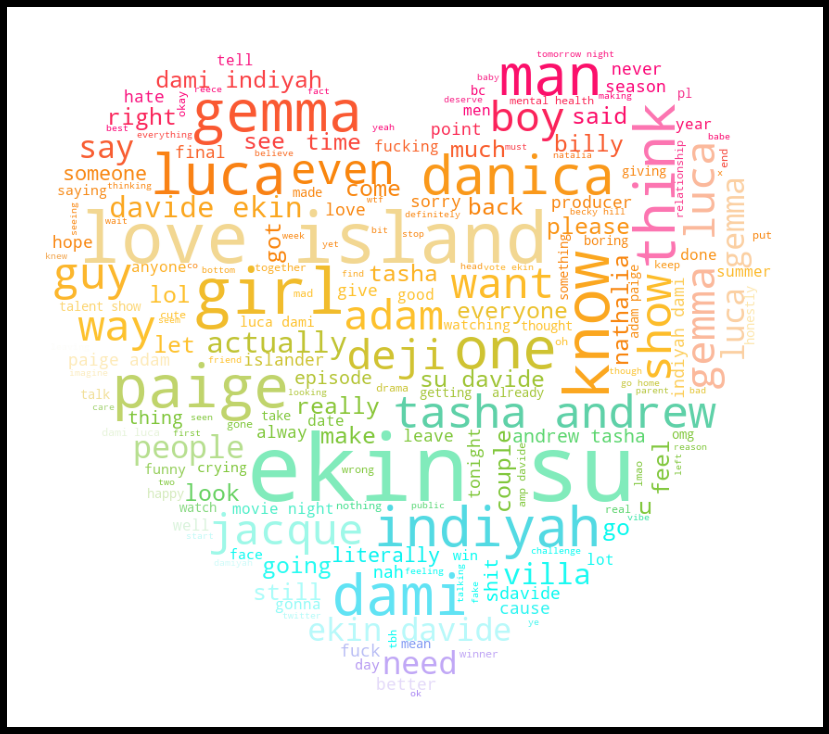

In [42]:
#Plot Word Cloud 
allWords = ' '.join([twts for twts in df['no_stopwords']])
wordcloud = WordCloud(mask=mask, random_state =21, max_font_size=100, width=800, height=400, background_color='white', color_func=image_colours).generate(allWords)
#Make the word cloud display at a larger size and give it a boarder 
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

(array([2.09825e+05, 1.08000e+02, 3.20000e+01, 1.30000e+01, 1.30000e+01,
        6.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   0. ,  403.3,  806.6, 1209.9, 1613.2, 2016.5, 2419.8, 2823.1,
        3226.4, 3629.7, 4033. ]),
 <BarContainer object of 10 artists>)

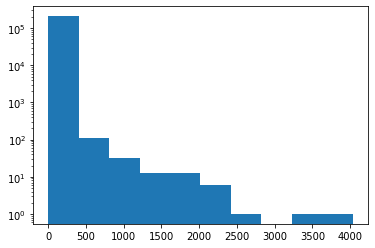

In [120]:
plt.hist(df["retweets"], log=True)

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))